In [1]:
from genetic_algorithm import GA
from constants import *
import matplotlib.pyplot as plt

In [2]:
def run_tests(name, n_tests, pop_size=100, mutate_rate=0.2, generations=500, selection_scheme=ROULETTE,
              crossover_type=MULTI_POINT, n_elites=50, thrust_value=870, low_level_mutation=True):
    thrust_lst = []
    fitness_lst = []
    print("\ntesting...", end='')
    for i in range(n_tests):
        ga = GA(pop_size=pop_size,
                mutate_treshold=mutate_rate,
                generations=generations,
                selection_scheme=selection_scheme,
                crossover_type=crossover_type,
                n_elites=n_elites,
                thrust_value=thrust_value,
                low_level_mutation=low_level_mutation)
        ga.run()
        best_thrust = ga.population[0].thrust
        best_fitness = ga.population[0].fitness_val
        thrust_lst.append(best_thrust)
        fitness_lst.append(best_fitness)
        print('.', end='')
    return {'thrust': thrust_lst, 'fitness': fitness_lst, 'name': name}


In [3]:
n_gens = 100
elit_arit_hi = run_tests('elitism, ar, high', n_gens, selection_scheme=ELITISM, crossover_type=ARITHMETIC,
                         low_level_mutation=False)
elit_arit_low = run_tests('elitism, ar, low', n_gens, selection_scheme=ELITISM, crossover_type=ARITHMETIC,
                          low_level_mutation=True)

elit_sp_hi = run_tests('elitism, sp, high', n_gens, selection_scheme=ELITISM, crossover_type=SINGLE_POINT,
                       low_level_mutation=False)
elit_sp_low = run_tests('elitism, sp, low', n_gens, selection_scheme=ELITISM, crossover_type=SINGLE_POINT,
                        low_level_mutation=True)

elit_mp_hi = run_tests('elitism, mp, high', n_gens, selection_scheme=ELITISM, crossover_type=MULTI_POINT,
                       low_level_mutation=False)
elit_mp_low = run_tests('elitism, mp, low', n_gens, selection_scheme=ELITISM, crossover_type=MULTI_POINT,
                        low_level_mutation=True)

rou_arit_hi = run_tests('roulette, ar, high', n_gens, selection_scheme=ROULETTE, crossover_type=ARITHMETIC,
                        low_level_mutation=False)
rou_arit_low = run_tests('roulette, ar, low', n_gens, selection_scheme=ROULETTE, crossover_type=ARITHMETIC,
                         low_level_mutation=True)

rou_sp_hi = run_tests('roulette, sp, high', n_gens, selection_scheme=ROULETTE, crossover_type=SINGLE_POINT,
                      low_level_mutation=False)
rou_sp_low = run_tests('roulette, sp, low', n_gens, selection_scheme=ROULETTE, crossover_type=SINGLE_POINT,
                       low_level_mutation=True)

rou_mp_hi = run_tests('roulette, mp, high', n_gens, selection_scheme=ROULETTE, crossover_type=MULTI_POINT,
                      low_level_mutation=False)
rou_mp_low = run_tests('roulette, mp, low', n_gens, selection_scheme=ROULETTE, crossover_type=MULTI_POINT,
                       low_level_mutation=True)
print("finished training")



testing.......................................................................................................
testing.......................................................................................................
testing.......................................................................................................
testing.......................................................................................................
testing.......................................................................................................
testing.......................................................................................................
testing.......................................................................................................
testing.......................................................................................................
testing.......................................................................................................


In [214]:
elitism_tests = [elit_arit_hi, elit_arit_low, elit_sp_hi, elit_sp_low, elit_mp_hi, elit_mp_low]
roulette_tests = [rou_arit_hi, rou_arit_low, rou_sp_hi, rou_sp_low, rou_mp_hi, rou_mp_low]
all_tests = elitism_tests + roulette_tests

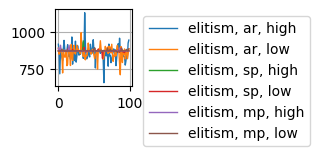

In [215]:
# plot elitism
correct_line = [870 for i in range(100)]
for i, t in enumerate(elitism_tests):
    plt.plot(t['thrust'], label=t['name'], linewidth = 1)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.rcParams['figure.figsize'] = [10, 10]
plt.savefig('elitism.png')
plt.show()
plt.close()


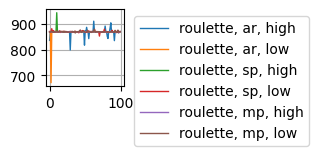

In [216]:
# plot roulette
correct_line = [870 for i in range(100)]
for i, t in enumerate(roulette_tests):
    plt.plot(t['thrust'], label=t['name'], linewidth = 1)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.rcParams['figure.figsize'] = [1, 1]
plt.savefig('roulette.png')
plt.show()
plt.close()


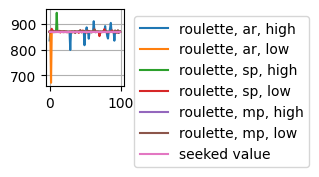

In [217]:
# plot elitism
correct_line = [870 for i in range(100)]
for i, t in enumerate(roulette_tests):
    plt.plot(t['thrust'], label=t['name'])
plt.plot(correct_line, label='seeked value')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('elitism.png')
plt.show()
plt.close()
